In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [162]:
data=pd.read_csv('titanic_train.csv')

In [163]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

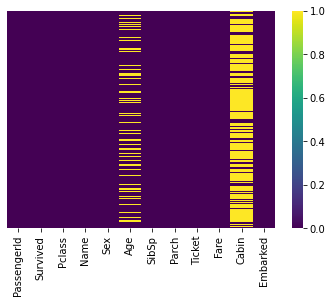

In [164]:
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis')

<AxesSubplot:xlabel='Age', ylabel='Survived'>

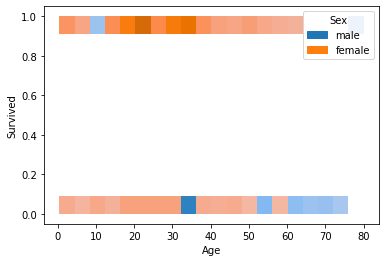

In [165]:
sns.histplot(x='Age',y='Survived',hue='Sex',kde=False, data=data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

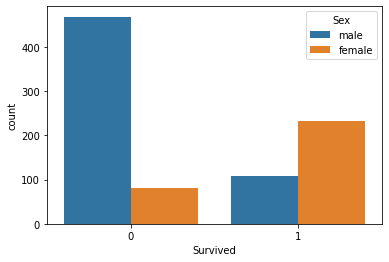

In [166]:
sns.countplot(x='Survived',hue='Sex', data=data)

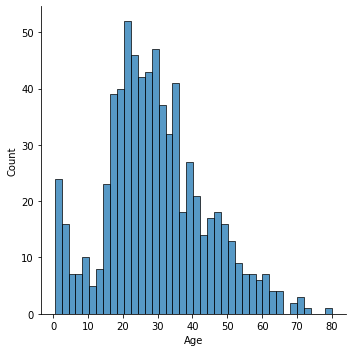

In [167]:
sns.displot(x='Age',data=data,bins=40)

<AxesSubplot:xlabel='Survived', ylabel='count'>

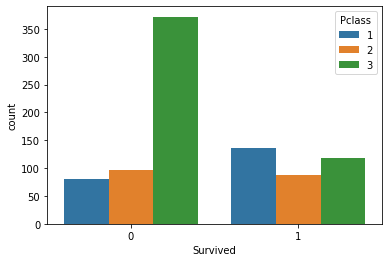

In [168]:
sns.countplot(x='Survived',hue='Pclass', data=data)

<AxesSubplot:>

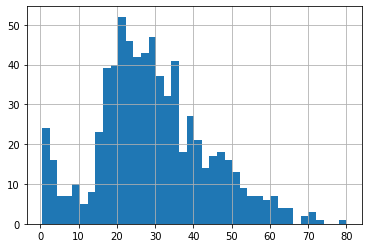

In [169]:
data['Age'].hist(bins=40)

In [170]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

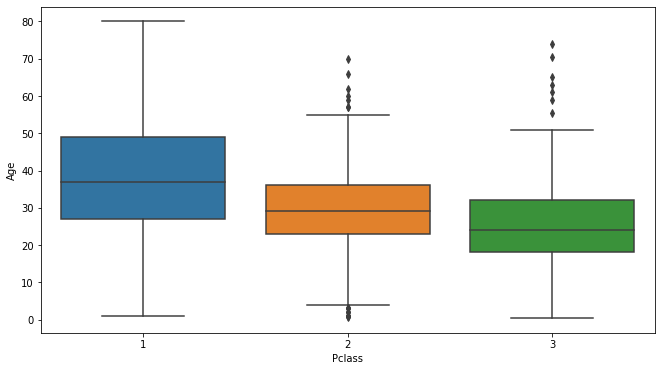

In [171]:
plt.figure(figsize=(11,6))
sns.boxplot(x='Pclass',y='Age',data=data)

In [172]:
import plotly.express as px
fig = px.box(data, x="Pclass", y="Age")
fig.show()

In [173]:
def fil_age(cols):
    age=cols[0]
    pclass=cols[1]
    
    if pd.isnull(age):
        
        if pclass==1:
            return 37
        elif pclass==2:
            return 29
        else:
            return 24
    
    else:
        return age
        

In [174]:
data['Age']=data[['Age','Pclass']].apply(fil_age,axis=1)

<AxesSubplot:>

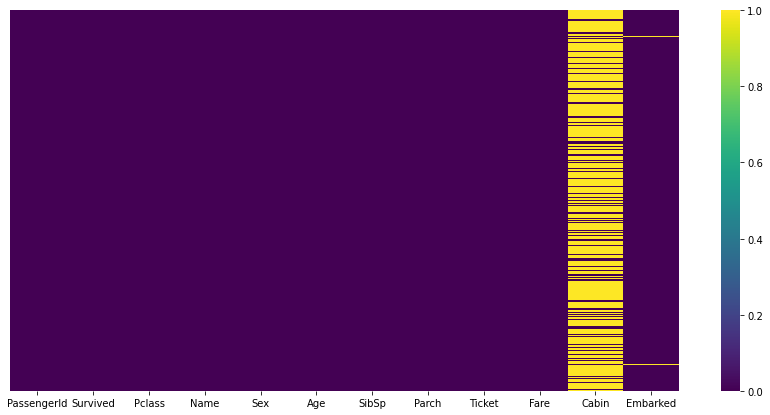

In [175]:
plt.figure(figsize=(15,7))
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis')

In [176]:
data.drop('Cabin',axis=1,inplace = True)

<AxesSubplot:>

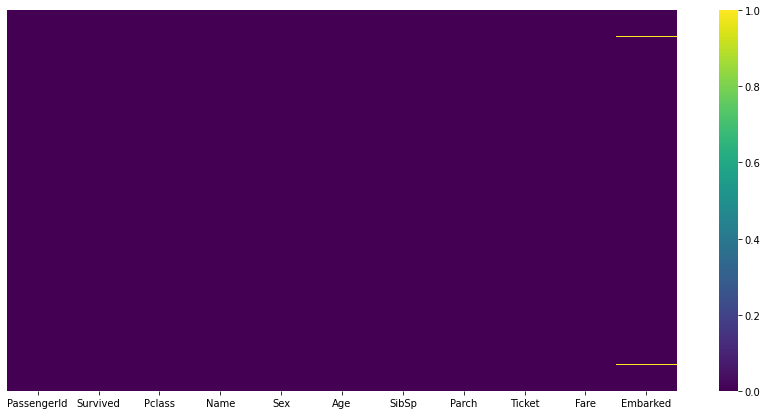

In [177]:
plt.figure(figsize=(15,7))
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis')

In [180]:
data.dropna( inplace=True)

<AxesSubplot:>

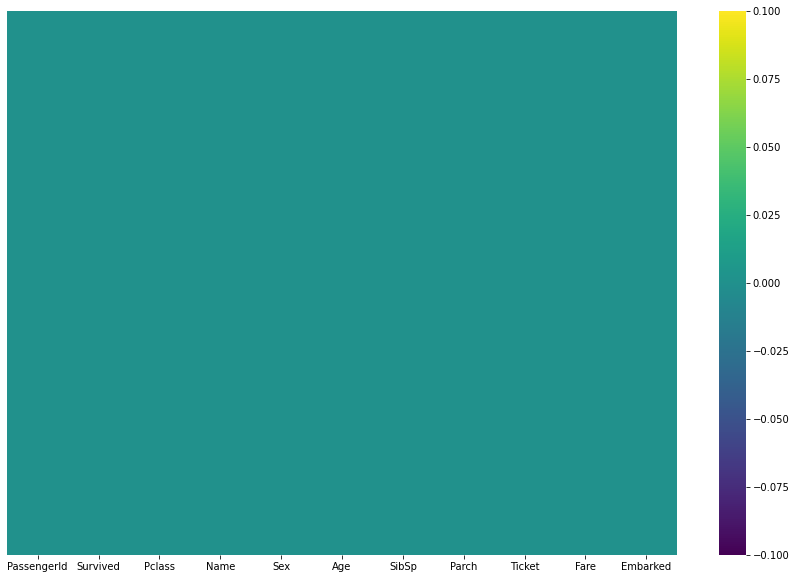

In [181]:
plt.figure(figsize=(15,10))
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis')

In [182]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [21]:
data.drop(['Name','Ticket'],axis=1,inplace=True)
data.head(2)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C


In [22]:
sex=pd.get_dummies(data=data['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [23]:
embark=pd.get_dummies(data=data['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [24]:
data=pd.concat([data,sex,embark],axis=1)

In [25]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,1,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,S,1,0,1


In [26]:
data.drop(['Sex','Embarked','PassengerId'],axis=1,inplace=True)

In [27]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [28]:
# now over data is ready to train

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train=data.drop('Survived',axis=1)
y_train=data['Survived']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [211]:
test=pd.read_csv('titanic_test.csv')
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [212]:
Id=test['PassengerId']
test.drop(['PassengerId','Name','Cabin'],axis=1,inplace=True)

In [213]:
test['Age']=test[['Age','Pclass']].apply(fil_age,axis=1)
test.tail()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
413,3,male,24.0,0,0,A.5. 3236,8.0500,S
414,1,female,39.0,0,0,PC 17758,108.9000,C
415,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,3,male,24.0,0,0,359309,8.0500,S
417,3,male,24.0,1,1,2668,22.3583,C


<AxesSubplot:>

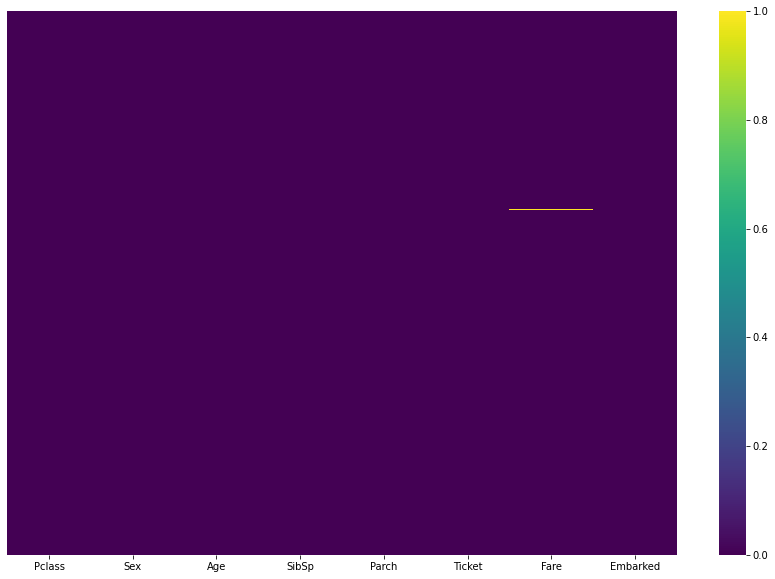

In [214]:

plt.figure(figsize=(15,10))
sns.heatmap(test.isnull(),yticklabels=False,cmap='viridis')

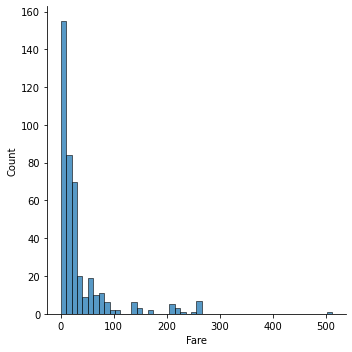

In [215]:
sns.displot(x='Fare',data=test,bins=50)

In [216]:
val=test['Fare'].median()

In [217]:
test['Fare']=test['Fare'].fillna(val)


In [218]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [219]:

sex=pd.get_dummies(data=test['Sex'],drop_first=True)
embark=pd.get_dummies(data=test['Embarked'],drop_first=True)

In [220]:
test=pd.concat([test,sex,embark],axis=1)

In [221]:
test.drop(['Sex','Embarked'],axis=1,inplace=True)
test.head(2)

,Pclass,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,3,34.5,0,0,330911,7.8292,1,1,0
1,3,47.0,1,0,363272,7.0000,0,0,1


In [222]:
test.drop(['Ticket'],axis =1, inplace =True)

In [223]:
test.tail()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
413,3,24.0,0,0,8.0500,1,0,1
414,1,39.0,0,0,108.9000,0,0,0
415,3,38.5,0,0,7.2500,1,0,1
416,3,24.0,0,0,8.0500,1,0,1
417,3,24.0,1,1,22.3583,1,0,0


In [224]:
X_test=test

In [225]:
from sklearn.linear_model import LogisticRegression

In [226]:
lgmodel=LogisticRegression()

In [227]:
lgmodel.fit(X_train,y_train)

C:\Users\ayush\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [228]:
predictions=lgmodel.predict(X_test)

In [229]:
from sklearn.metrics import classification_report

In [230]:
print(classification_report(y_train,predictions_1))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       549
           1       0.76      0.71      0.73       340

    accuracy                           0.80       889
   macro avg       0.80      0.79      0.79       889
weighted avg       0.80      0.80      0.80       889



In [231]:
df=pd.DataFrame(predictions,columns=['Survived'])
test=pd.concat([Id,test,df],axis=1)


In [232]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Survived
0,892,3,34.5,0,0,7.8292,1,1,0,0
1,893,3,47.0,1,0,7.0000,0,0,1,0
2,894,2,62.0,0,0,9.6875,1,1,0,0
3,895,3,27.0,0,0,8.6625,1,0,1,0
4,896,3,22.0,1,1,12.2875,0,0,1,1


In [233]:
submission = test[['PassengerId','Survived']]
submission.to_csv('submission.csv', index=False)

In [234]:
s=pd.read_csv('submission.csv')

In [235]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB
